### selenium
- `https://www.selenium.dev`
- 자동화를 목적으로 만들어진 다양한 브라우져와 언어를 지원하는 라이브러리
- 크롬 브라우져 설치
    - 크롬 브라우져 드라이버 다운로드 (크롬 브라우져와 같은 버전)
    - 다운로드한 드라이버 압축 해제
    - chromedriver, chromedriver.exe 생성
    - windows : 주피터 노트북 파일과 동일한 디렉토리에 chromedriver.exe 파일 업로드
    - mac : sudo cp ~/Download/chromedirver /usr/local/bin

In [1]:
import pandas as pd 
from selenium import webdriver 
from selenium.webdriver.common.by import By

In [3]:
driver = webdriver.Chrome()

In [4]:
# 페이지 이동부터
driver.get('https://daum.net')

In [5]:
# 검색창에 검색어 입력

# 엘리먼트 선택. 똑같은 창 일반 크롬 브라우저 개발자 도구로 요소 찾아서
# 엘리먼트를 선택한 후에 파이썬이란 문자열을 입력해 준다 > 검색창에 파이썬이 입력됨

driver.find_element(By.CSS_SELECTOR, '#q').send_keys('파이썬')

In [6]:
# 검색 아이콘 클릭
selector = '.inner_search > .ico_pctop.btn_search'
driver.find_element(By.CSS_SELECTOR, selector).click()

# .click()으로 클릭 이벤트가 발생됨

In [8]:
# 엘리먼트 20개 선택(연관검색어)
selector = '#netizen_lists_top > .wsn'
elements = driver.find_elements(By.CSS_SELECTOR, selector) #여긴 엘리먼트 여러개를 불러오는거라 s 붙어야함 파인드 엘리먼츠스하고 뷰숲이 셀렉트랑 같은거라고 생각하셈
# .wsn >> class 이름
len(elements)

20

In [10]:
# 펼치는 이벤트 추가
selector = '#netizen_more_btn_top' 
driver.find_element(By.CSS_SELECTOR, selector).click()

In [11]:
# 텍스트 가져오기
keywords = [element.text for element in elements] # element.text를 for문만큼 출력하겠다
keywords
# 밑에 점점점 왜그러냐면 셀레니움은 이 화면에 있는 데이터를 가져온 것. html 코드 안에 존재한다 해도 화면에 존재하지 않으면 데이터를 가져오지 못한다.
# 클릭 이벤트를 줘서 얘를 펼친 다음에 가져와야 모든 데이터가 가져와짐 >> 화면에 있어야지만 클릭 이벤트를 발생시킬 수 있다? 강사님이 말 잘못하신듯 ㅇㅇ 셀레니움 말하시는듯
# 셀레니움이 애초에 테스트용으로 만들어짐 보이지 않는 것은 클릭되면 안 되잖아 그 용도로 만들어진 거임
# 아래에 보이지 않는 엘리멘트를 추가하려면 스크롤을 내리는 이벤트를 추가해 줘야 함

['파이썬 프로그래밍',
 '파이썬 강좌',
 '파이썬 기초',
 '파이썬 뱀',
 '파이썬 책',
 '파이썬 코딩',
 '파이썬 자격증',
 '파이썬 다운로드',
 '파이썬 맵',
 '파이썬 설치',
 '파이썬 엑셀',
 'python',
 '파이썬 활용',
 '파이썬 주식',
 '파이썬 학원',
 '파일썬',
 '파이썬 강의',
 '자바',
 '파이썬 코드',
 '파이썬 나무위키']

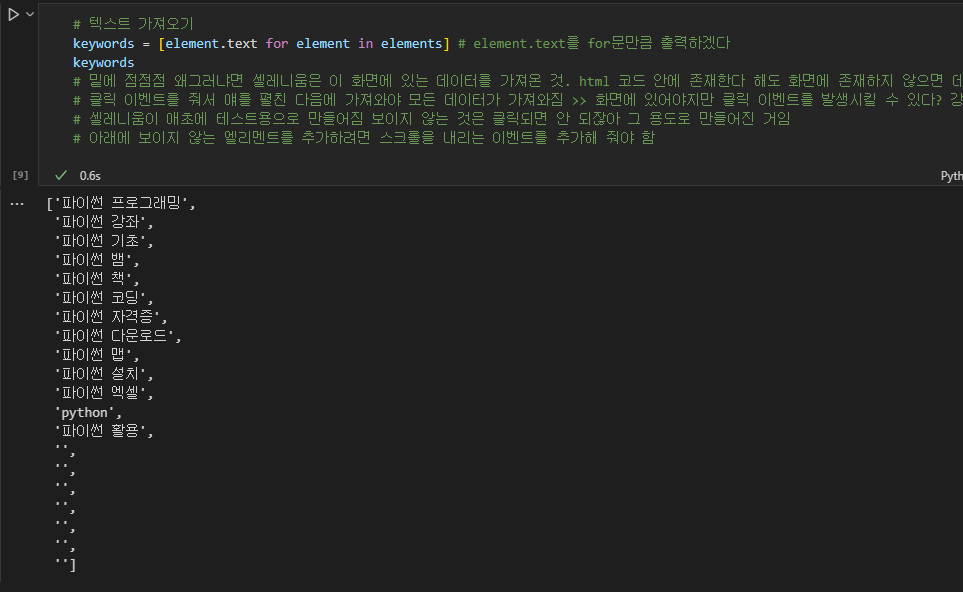

In [12]:
# 자바스크립트 코드 실행해서 스크롤 내리기 이벤트
driver.execute_script('window.scrollTo(200, 300);') # 이런식으로 스크롤을 맞춰서 화면을 조정할 수 있음
# 셀레니움 버전은 웬만하면 웹을 내가 건들지마셈 위험함 스크롤이나 클릭 되긴한데 그럼 코드에서 에러나니까 위험하다는 말임

In [13]:
# 브라우저 종료
driver.quit()

#### 텍스트 데이터 가져오기
- TED 사이트 : `https://www.ted.com`

In [14]:
driver = webdriver.Chrome() 
driver.get('https://www.ted.com/talks')

In [15]:
selector = '.talks-header__title'
driver.find_element(By.CSS_SELECTOR, selector).text

'4200+ talks to stir your curiosity'

In [ ]:
# 여태 css 셀렉터를 이용했는데 xpath를 이용해서 엘리먼트를 선택할 수 있다.
# 이것도 할 줄 알아야 하는 게 회사 가면 스크래피 scrapy를 이용해서 파이썬 크롤링에 많이 사용한다. 진짜 크롤링을 전문적으로 하고 싶으면 스크래피 프레임워크를 공부해 보는 것을 추천함
# 이것도 크롬 브라우저 개발자도구에서 지원해주는데 값복사 > css selector 아니고 xpath 선택하셈
# 조금 더 멀티태스킹을 추가해서 디비에 저장한다던가, 디비를 만들 때 모델이란 개념을 사용한다던가 그럼 xpath를 써야 함
# xpath의 의미 
# xpath를 이용한 엘리먼트 선택 
# # //*[@id="shoji"]/div[2]/div/div[2]/header/div/div[1]
# // : 최상위 엘리먼트 (도큐먼트에서 최상위 엘리먼트로 이동한 다음에)
# * : 모든 하위 엘리먼트 (css 셀렉터에서 공백을 쓰는 경우처럼)
# [@id="shoji"] : 속성값으로 엘리먼트 선택 아이디 값이 shoji인 것을 선택
# / : 한단계 하위 엘리먼트 (부등호 표시로 하위 엘리먼트를 표시하는 것처럼 의미함)
# div[2] : 태그 n번째 [div 태그를 가진 엘리먼트 2번째를 의미]

In [16]:
selector = '//*[@id="shoji"]/div[2]/div/div[2]/header/div/div[1]' 
driver.find_element(By.XPATH, selector).text

'4200+ talks to stir your curiosity'

#### Headless
- 브라우져를 화면에 띄우지 않고 메모리상에서만 올려서 크롤링하는 방법 
- window가 지원되지 않는 환경에서 사용이 가능
- chrome version 60.0.0.0 이상부터 지원 합니다.

In [17]:
# 헤드리스는 브라우저를 띄우지 않고 수집하는 방법
# 일단 꺼 
driver.quit()

In [19]:
# 옵션만 추가해 주면 셀레니움을 썼는데 화면에 띄워지지 않음
options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome(options=options)
driver.get('https://www.ted.com/talks')
selector = '.talks-header__title'
driver.find_element(By.CSS_SELECTOR, selector).text

'4200+ talks to stir your curiosity'

In [20]:
driver.quit()